# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [2]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [3]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
6304,Enough,2002,Jim Toller,man,308,0.021917,68.0,58.0,2226
3257,3 Men and a Baby,1987,Peter Mitchell,man,5603,0.431066,42.0,373.0,1408
2083,El mariachi,1992,Moco'S Men,man,475,0.212054,NaN,4.0,1137
18184,The Darjeeling Limited,2007,Peter,man,1656,0.209859,34.0,15.0,6832
9998,The Roommate,2011,Rebecca,woman,4657,0.329512,25.0,40.0,3237
4945,Boogie Nights,1997,The Colonel Jam,man,1010,0.056412,66.0,50.0,1884
18792,Hatchet,2006,Mr Permatteo,man,122,0.033786,NaN,NaN,7175
265,Austin Powers: International Man of Mystery,1997,Frau Farbissina,woman,223,0.040597,44.0,102.0,698
9397,Ocean's Twelve,2004,Fran�Ois Toulou,man,1446,0.073394,38.0,176.0,3031
6087,Dogma,1999,Cardinal Glick,man,950,0.028962,62.0,52.0,2172


Generate information about all the columns in the data 

In [4]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

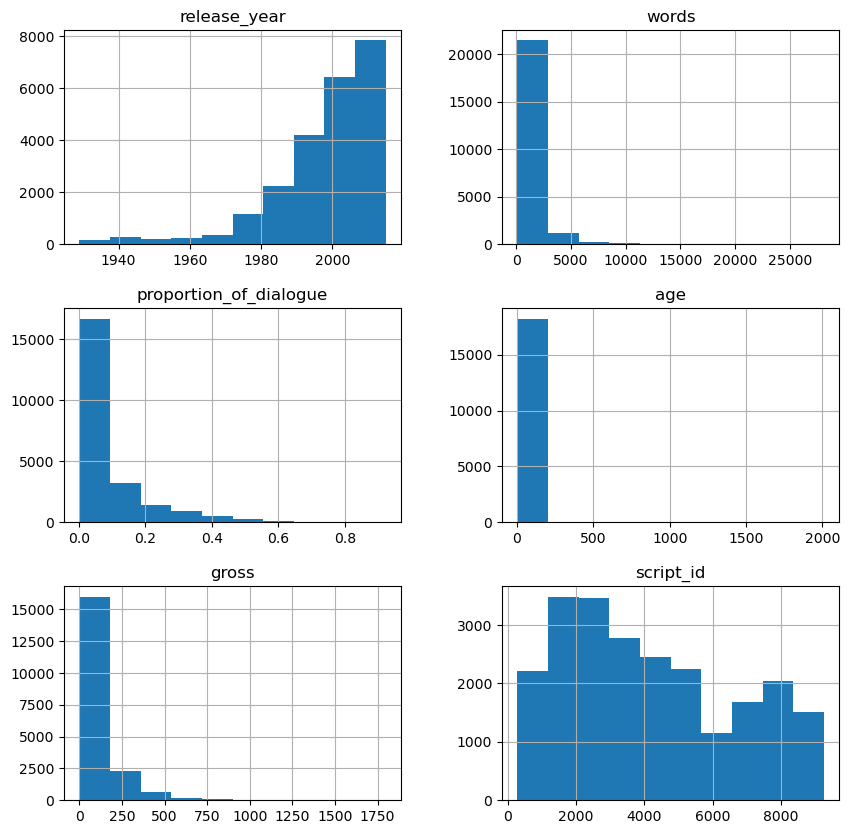

In [5]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [6]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

There is a lot of data that is unaccounted for. 

In [7]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [8]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [9]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [10]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [11]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [12]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [13]:
film_of_interest = "Frozen"

In [14]:
film_filter = film_df[film_df["title"] == film_of_interest]

In [15]:
print(film_filter)

       title  release_year character gender  words  proportion_of_dialogue  \
6725  Frozen          2013      Anna  woman   2397                0.352656   
6726  Frozen          2013      Duke    man    370                0.054436   
6727  Frozen          2013      Elsa  woman    525                0.077240   
6728  Frozen          2013      Hans    man    794                0.116816   
6729  Frozen          2013      King    man    126                0.018538   
6730  Frozen          2013  Kristoff    man   1445                0.212594   
6731  Frozen          2013     Oaken    man    194                0.028542   
6732  Frozen          2013      Olaf    man    946                0.139179   

       age  gross  script_id  
6725  27.0  429.0       2343  
6726   NaN  429.0       2343  
6727  36.0  429.0       2343  
6728  43.0  429.0       2343  
6729   NaN  429.0       2343  
6730   NaN  429.0       2343  
6731   NaN  429.0       2343  
6732  46.0  429.0       2343  


If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [16]:
film_filter.sort_values(by='words', ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
6725,Frozen,2013,Anna,woman,2397,0.352656,27.0,429.0,2343
6730,Frozen,2013,Kristoff,man,1445,0.212594,NaN,429.0,2343
6732,Frozen,2013,Olaf,man,946,0.139179,46.0,429.0,2343
6728,Frozen,2013,Hans,man,794,0.116816,43.0,429.0,2343
6727,Frozen,2013,Elsa,woman,525,0.077240,36.0,429.0,2343
6726,Frozen,2013,Duke,man,370,0.054436,NaN,429.0,2343
6731,Frozen,2013,Oaken,man,194,0.028542,NaN,429.0,2343
6729,Frozen,2013,King,man,126,0.018538,NaN,429.0,2343


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [17]:
character_of_interest = "Elsa"

In [18]:
character_filter = film_df[film_df["character"] == character_of_interest]

In [19]:
print(character_filter)

                                   title  release_year character gender  \
6727                              Frozen          2013      Elsa  woman   
7714  Indiana Jones and the Last Crusade          1989      Elsa  woman   

      words  proportion_of_dialogue   age  gross  script_id  
6727    525                0.077240  36.0  429.0       2343  
7714   1452                0.096903  23.0  431.0       2604  


### ❓ How does this data align with your experience/knowledge of the film?

I was suprised at how little of words Elsa spoke, especially as being one of the main characters of the movie. I suspected her to be at least second or third. It also shocked me that both Kristoff and Hans had more words spoken than her. 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

This example brings to my attention how important the little details can be. Data collection can tell us a lot more about something than what we just think. In addition, it is very important to be truthful and also organized in data collection because one little slip up can mess up the entire data. 

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [20]:
sorted_df = film_df.sort_values(by='proportion_of_dialogue', ascending=False)

In [21]:
sorted_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [22]:
sort_df = film_df.sort_values(by='proportion_of_dialogue', ascending=True)

In [23]:
sort_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [24]:
sort_df = film_df.sort_values(by='words', ascending=True)

In [25]:
sort_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Suprisingly, there are only six women out of twenty characters with the least amount of words spoken. I expected there to be more women. In addition, there is a good mix between newer and older movies. 

## Groupby

Group by film and then calculate the sum total for every column.

In [29]:
film_df.groupby('title').sum()

/var/folders/4q/nvrns__x6gvdypz8mkzb5c4w0000gn/T/ipykernel_62850/339622851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  film_df.groupby('title').sum()


,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [40]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [41]:
film_df.groupby(['title', 'gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [42]:
women_filter = film_df['gender'] == 'woman'

In [43]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [44]:
men_filter = film_df['gender'] == 'man'

In [45]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [46]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [47]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [48]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [49]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [50]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [51]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

As expected, the top 20 men double (at least) in words as the top 20 women, even when the films seem to be more "womanly." 

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': 'Top 20 Women Characters by Words Spoken'}, xlabel='title'>

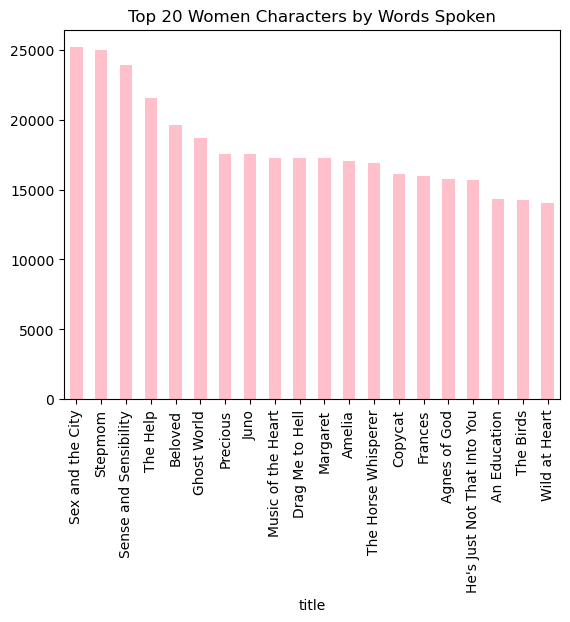

In [53]:
top20_women.plot(
    kind='bar',
    title ='Top 20 Women Characters by Words Spoken',
    color ='pink'
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

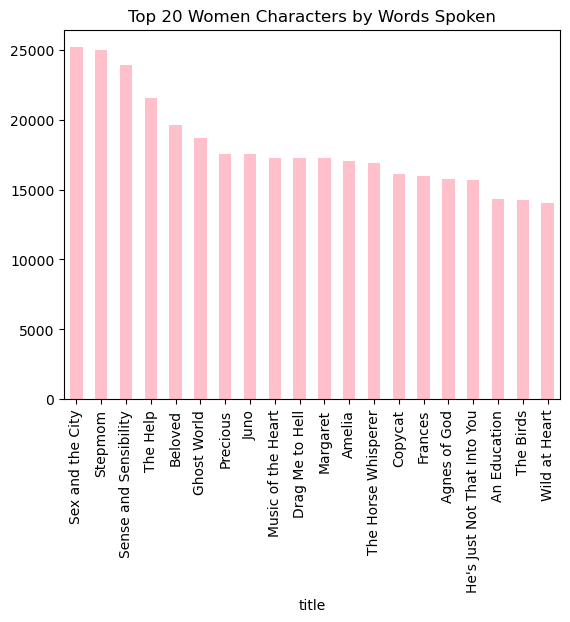

In [55]:
ax = top20_women.plot(
    kind='bar',
    title='Top 20 Women Characters by Words Spoken',
    color='pink'
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

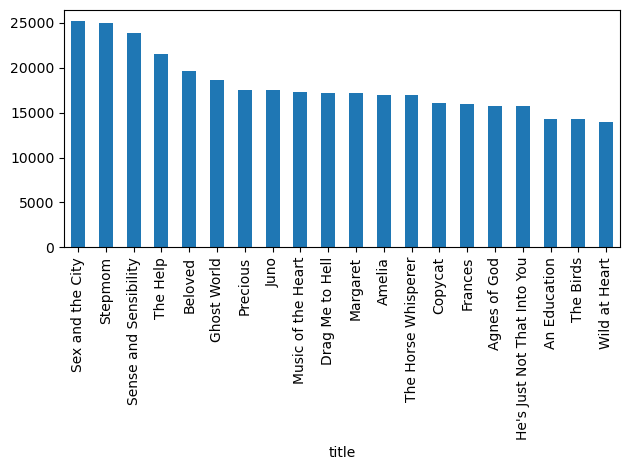

In [56]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [57]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [58]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [59]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

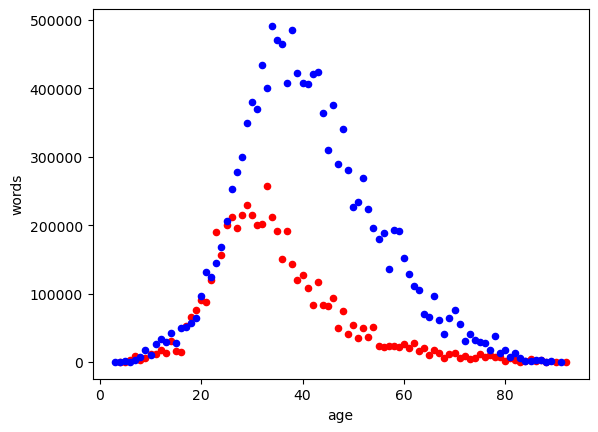

In [60]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

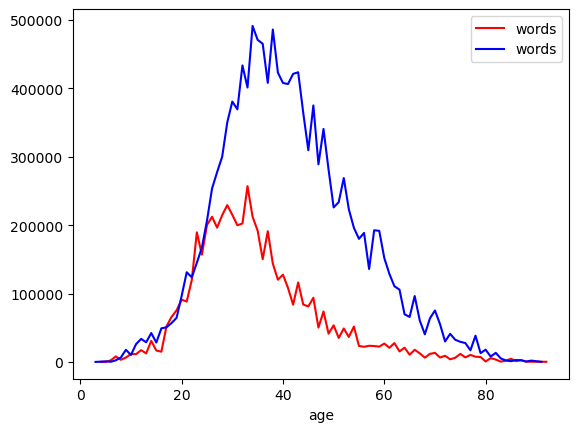

In [62]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

Exploratory Data Analysis (EDA) play a vital role in data and analytics. So far, my impressions of EDA techniques are positive. They are essential for understanding data, patterns, and making informed decisions. From what I have seen and done so far, it helps me explore data further in depth in a more effecient way. EDA helps create visualization tools like bar graphs, scatter plots, line plots, etc. By looking at the visualizations it provides insights on the distribution of data and the presence of outliers. This helps aid in data analysis. There might be something that you miss when surfacing over data, but by using EDA techniques, it brings data into light. We are able to use measures such as mean and median to calculate the data quicker. In addition, EDA helps recognize patterns and the relationships between variables, which help lead to discoveries. EDA techniques also provide context to data. It allows us to consider the real-world implications of data and its patterns. As we saw, the example of words and dialogue in male and female characters in movies. By using techniques and creating visualizations, we were able to uncover a pattern. Lastly, we are also able to see missing data and hhow it affects the analysi and quality of the data collected. I like how EDA is able to adapt to the different kinds of data we are working with. Overall, I think EDA techniques are valuable tools for data analysis. They allow us to effectively explore, analyze, and understand datasets, trends, realtionships, and push decision making. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

Throughout the EDA process, I encountered several hurdles. For instance, at the beginning of the midterm and trying to choose a film, there were so many that it was hard to choose from. While it is great that we are able to collect mass amounts of data and have mass amounts of data to look at, I feel like I probably overlooked films that I wish I wouldv'e chosen or that would be neat to look into, it was just hard to find. In addition, although we were told which types of graphs to use. I would have a hard time figuring out which way would best represent the data given to me. I would question which cases I should use a pie chart versus a bar graph for. Another hurdle that I have encountered is having to deal with data that is incomplete and missing values. It throws the results off, which therefore throw off the analysis. Lastly, since I am new to this process, I struggled with identifying what I needed to do to get through to the next step. As I have learrned, coding is very literal and specific, and you have to put yourself in the view of the computer. It would take me a while to figure out the right feature and/or code that I needed to use and how I was supposed to execute it. Overall, I was pleased with how I did using the EDA process. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

First, I chose the movie "Frozen" because I love Disney movies, and I loved the "sister" aspect that this Disney movie had. I expected Anna and Elsa to be the top two characters who spoke the most amound of words and had the biggest proportion of dialogue. I was very shocked with the results. I was also shocked with the most amount of words spoken by the top 20 male characters versus the most amount of words spoken by the top 20 females. The top male had over twice the amount of words spoken by the top female. I would also want to further explore other Disney films to see how the amount of words the main character (a female) spoke versus the male counterparts. I would want to graph these different results to see the pattern that it uncovered. In addition, I would also want to see the pattern of male dialouge versus female dialouge and how it has developed through the years. I would see if there was an improvement in female dialogue, or if it is near the same place that it started. I would use a line plot to see how the trend of dialogue developed through the years. Lastly, if I had the data, I would compare the difference in the amount of words spoken to animated film versus live action. I tthink it would be interesting to see the difference, if there was one. I would also like to see if there is a correlation between the proporiton of dialouge and age. Do older men talk more than younger men? Do younger women talk more than older women? 